# Objetivo:

O objetivo deste projeto é desenvolver um modelo de regressão utilizando o PySpark para prever o valor do carro volkswagen "up tsi" usado. Através da análise de dados relevantes, o projeto busca criar um modelo preditivo que seja capaz de estimar com precisão o valor do "up tsi" usado com base em nas
variáveis ano e quilometragem.

### Subobjetivos:

- Realizar uma análise exploratória dos dados para compreender a distribuição, correlações e padrões das variáveis envolvidas.
  
- Identificar tendências e insights que possam orientar a seleção de recursos e a abordagem de modelagem.

- Escolher um ou mais algoritmos de regressão disponíveis no PySpark, como Regressão Linear, Árvores de Decisão ou Random Forest para construir modelos preditivos.
  
- Dividir os dados em conjuntos de treinamento e teste para avaliar o desempenho dos modelos.

- Treinar os modelos de regressão usando o conjunto de treinamento e ajustar seus parâmetros, se necessário.
  
- Avaliar o desempenho dos modelos utilizando métricas de regressão, como MSE (Mean Squared Error) ou RMSE (Root Mean Squared Error), para medir o quão bem eles se ajustam aos dados de teste.

- Realizar ajustes e otimizações nos modelos com base nos resultados da avaliação, buscando melhorar a precisão das previsões.

### Resumo do Projeto:

Este projeto tem como foco a criação de um modelo de regressão utilizando o PySpark para prever o valor do "up tsi" usado em veículos. Através da análise de dados, engenharia de recursos e treinamento de modelos, busca-se desenvolver um sistema de previsão capaz de estimar com precisão o desempenho do "up tsi" com base em outras características dos veículos. O resultado final será um modelo otimizado e interpretável, pronto para auxiliar proprietários e entusiastas de carros na avaliação do valor do "up tsi" usado em diferentes contextos.

### Dificuldades:

- Apesar da semelhança com outras linguagem houve confusão em alguns momentos com as sintaxes.
- Em encontrar as funções corretas.
- Banco de dados com poucas variáveis tornou o modelo simplista demasiadamente.
- Encontrar na internet a solução dos problemas que estava tendo.

# Projeto:

In [1]:
!pip install pyspark
# criando SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=626cff25c0c53e1a73ff32ccb827f8e3a165dc39e6fc622f5bfaa187ee69bce8
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
dados = spark.read.csv('uptsi.csv', header=True, inferSchema=True, sep=',', encoding='utf-8' )

In [3]:
dados.show()

+--------------------+----+------+-----+
|             veiculo| ano|    km|valor|
+--------------------+----+------+-----+
| Á/G 1.0 TSI Move...|2015| 95500|51990|
| Á/G 1.0 TSI Conn...|2019| 47047|67000|
| Á/G 1.0 TSI Conn...|2020| 58968|68990|
| Á/G 1.0 Take Manual|2016| 67000|45900|
| Á/G 1.0 TSI Move...|2016| 59600|57790|
| Á/G 1.0 TSI Move...|2018| 47300|65890|
| Á/G 1.0 Move Manual|2016| 93000|47900|
| Á/G 1.0 MPI 12V ...|2014|151502|35990|
| Á/G 1.0 TSI Xtre...|2019| 55824|69990|
| Á/G 1.0 TSI Pepp...|2017| 83395|65900|
| Á/G 1.0 MPI 12V ...|2020| 74100|69900|
| Á/G 1.0 TSI Move...|2018|105000|63900|
| Á/G 1.0 TSI Move...|2016| 86904|54990|
| Á/G 1.0 Move Manual|2018| 37814|73900|
| Á/G 1.0 Move Manual|2018| 15000|68000|
| Á/G 1.0 TSI Conn...|2019| 47000|72000|
| Á/G 1.0 Move Manual|2018| 50118|64990|
| Á/G 1.0 TSI Pepp...|2019| 56660|71990|
| Á/G 1.0 Take Manual|2017|110200|46900|
| Á/G 1.0 Take Manual|2018|106400|56900|
+--------------------+----+------+-----+
only showing top

In [4]:
dados.count()

598

In [5]:
dados.printSchema()

root
 |-- veiculo: string (nullable = true)
 |-- ano: integer (nullable = true)
 |-- km: integer (nullable = true)
 |-- valor: integer (nullable = true)



In [6]:
dados.select('*').groupBy('ano').count().show()

+----+-----+
| ano|count|
+----+-----+
|2018|   91|
|2015|   91|
|2014|   89|
|2019|  107|
|2020|    8|
|2016|  122|
|2017|   79|
|2021|   11|
+----+-----+



In [7]:
dados.show()

+--------------------+----+------+-----+
|             veiculo| ano|    km|valor|
+--------------------+----+------+-----+
| Á/G 1.0 TSI Move...|2015| 95500|51990|
| Á/G 1.0 TSI Conn...|2019| 47047|67000|
| Á/G 1.0 TSI Conn...|2020| 58968|68990|
| Á/G 1.0 Take Manual|2016| 67000|45900|
| Á/G 1.0 TSI Move...|2016| 59600|57790|
| Á/G 1.0 TSI Move...|2018| 47300|65890|
| Á/G 1.0 Move Manual|2016| 93000|47900|
| Á/G 1.0 MPI 12V ...|2014|151502|35990|
| Á/G 1.0 TSI Xtre...|2019| 55824|69990|
| Á/G 1.0 TSI Pepp...|2017| 83395|65900|
| Á/G 1.0 MPI 12V ...|2020| 74100|69900|
| Á/G 1.0 TSI Move...|2018|105000|63900|
| Á/G 1.0 TSI Move...|2016| 86904|54990|
| Á/G 1.0 Move Manual|2018| 37814|73900|
| Á/G 1.0 Move Manual|2018| 15000|68000|
| Á/G 1.0 TSI Conn...|2019| 47000|72000|
| Á/G 1.0 Move Manual|2018| 50118|64990|
| Á/G 1.0 TSI Pepp...|2019| 56660|71990|
| Á/G 1.0 Take Manual|2017|110200|46900|
| Á/G 1.0 Take Manual|2018|106400|56900|
+--------------------+----+------+-----+
only showing top

# Regressão Linear

In [8]:
# fazer a vetorização dos dados, pegando todas as colunas e transformando em vetores
from pyspark.ml.feature import VectorAssembler
dados = dados.withColumnRenamed('valor','label')# mudando a coluna preço para label, é a coluna que queremos prever

In [9]:
dados.show()

+--------------------+----+------+-----+
|             veiculo| ano|    km|label|
+--------------------+----+------+-----+
| Á/G 1.0 TSI Move...|2015| 95500|51990|
| Á/G 1.0 TSI Conn...|2019| 47047|67000|
| Á/G 1.0 TSI Conn...|2020| 58968|68990|
| Á/G 1.0 Take Manual|2016| 67000|45900|
| Á/G 1.0 TSI Move...|2016| 59600|57790|
| Á/G 1.0 TSI Move...|2018| 47300|65890|
| Á/G 1.0 Move Manual|2016| 93000|47900|
| Á/G 1.0 MPI 12V ...|2014|151502|35990|
| Á/G 1.0 TSI Xtre...|2019| 55824|69990|
| Á/G 1.0 TSI Pepp...|2017| 83395|65900|
| Á/G 1.0 MPI 12V ...|2020| 74100|69900|
| Á/G 1.0 TSI Move...|2018|105000|63900|
| Á/G 1.0 TSI Move...|2016| 86904|54990|
| Á/G 1.0 Move Manual|2018| 37814|73900|
| Á/G 1.0 Move Manual|2018| 15000|68000|
| Á/G 1.0 TSI Conn...|2019| 47000|72000|
| Á/G 1.0 Move Manual|2018| 50118|64990|
| Á/G 1.0 TSI Pepp...|2019| 56660|71990|
| Á/G 1.0 Take Manual|2017|110200|46900|
| Á/G 1.0 Take Manual|2018|106400|56900|
+--------------------+----+------+-----+
only showing top

In [10]:
# selecionando as colunas que interessa para prever o modelo
X = ['ano','km']

In [11]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features') # colocando todas as colunas com o nome de features

In [12]:
dataset_prep = assembler.transform(dados).select('features', 'label')

In [13]:
dataset_prep.toPandas()

,features,label
0,"[2015.0, 95500.0]",51990
1,"[2019.0, 47047.0]",67000
2,"[2020.0, 58968.0]",68990
3,"[2016.0, 67000.0]",45900
4,"[2016.0, 59600.0]",57790
...,...,...
593,"[2015.0, 106000.0]",43990
594,"[2015.0, 36094.0]",53990
595,"[2017.0, 50600.0]",51900
596,"[2018.0, 19855.0]",67900


# Exploração dos dados

In [14]:
from pyspark.ml.stat import Correlation
import pandas as pd
correlacao = Correlation.corr(dataset_prep, 'features').collect()
correlacao = Correlation.corr(dataset_prep, 'features').collect()[0][0]# trabalhando somente com a correlação de pearson
correlacao

DenseMatrix(2, 2, [1.0, -0.0223, -0.0223, 1.0], False)

In [15]:
correlacao.toArray()# trazendo a correlacao para um array

array([[ 1.        , -0.02232976],
       [-0.02232976,  1.        ]])

In [16]:
dataframe_correlacao = pd.DataFrame(correlacao.toArray(), columns=X, index=X)

In [17]:
dataframe_correlacao

,ano,km
ano,1.00000,-0.02233
km,-0.02233,1.00000


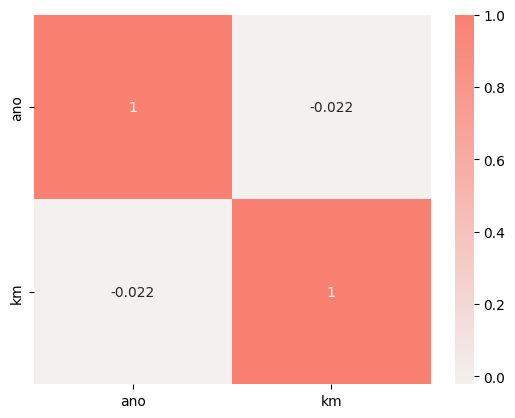

In [18]:
import seaborn as sns
paleta = sns.color_palette('light:salmon', as_cmap=True)
ax = sns.heatmap(dataframe_correlacao.round(4), annot=True, cmap=paleta)

# Treino e teste

In [19]:
from pyspark.ml.regression import LinearRegression
treino, teste = dataset_prep.randomSplit([0.7,0.3], seed=101)# 70% para treino e 30% para teste
lr = LinearRegression()
modelo_lr = lr.fit(treino)
previsoes_lr_treino = modelo_lr.transform(treino)
previsoes_lr_treino.toPandas()

,features,label,prediction
0,"[2014.0, 1.0]",29900,40869.846450
1,"[2014.0, 999.0]",43900,40865.638146
2,"[2014.0, 1234.0]",41990,40864.647212
3,"[2014.0, 34653.0]",35900,40723.728052
4,"[2014.0, 60000.0]",33500,40616.846400
...,...,...,...
414,"[2020.0, 74100.0]",69900,74813.866388
415,"[2021.0, 28000.0]",82990,80717.670665
416,"[2021.0, 35188.0]",80900,80687.360754
417,"[2021.0, 53881.0]",78000,80608.537275


# Métricas

In [20]:
# R2 -> significa quanto o modelo esta ajustado aos dados
# RMSE -> o erro médio elevado ao quadrado
resumo_treino = modelo_lr.summary

In [21]:
resumo_treino.r2

0.7642466743692523

In [22]:
resumo_treino.rootMeanSquaredError

5749.590053869677

In [23]:
resumo_teste = modelo_lr.evaluate(teste)

In [24]:
resumo_teste.r2

-2.2914860367028362

In [25]:
resumo_teste.rootMeanSquaredError

22666.254768071733

In [26]:
print('Linear Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % resumo_treino.r2)
print("RMSE: %f" % resumo_treino.rootMeanSquaredError)
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % resumo_teste.r2)
print("RMSE: %f" % resumo_teste.rootMeanSquaredError)

Linear Regression
Dados de Treino
R²: 0.764247
RMSE: 5749.590054

Dados de Teste
R²: -2.291486
RMSE: 22666.254768


# Árvore de Decisão - Regressão

In [27]:
from pyspark.ml.regression import DecisionTreeRegressor
dtr = DecisionTreeRegressor(seed=101, maxDepth=3)
modelo_dtr = dtr.fit(treino)
previsoes_dtr_treino = modelo_dtr.transform(treino)
previsoes_dtr_treino.show()

+----------------+-----+-----------------+
|        features|label|       prediction|
+----------------+-----+-----------------+
|    [2014.0,1.0]|29900|40935.87301587302|
|  [2014.0,999.0]|43900|40935.87301587302|
| [2014.0,1234.0]|41990|40935.87301587302|
|[2014.0,34653.0]|35900|40935.87301587302|
|[2014.0,60000.0]|33500|40935.87301587302|
|[2014.0,63000.0]|44900|40935.87301587302|
|[2014.0,67400.0]|41900|40935.87301587302|
|[2014.0,68000.0]|45900|40935.87301587302|
|[2014.0,69000.0]|43800|40935.87301587302|
|[2014.0,70773.0]|49900|40935.87301587302|
|[2014.0,72430.0]|39900|40935.87301587302|
|[2014.0,74240.0]|36000|40935.87301587302|
|[2014.0,77200.0]|35700|40935.87301587302|
|[2014.0,77200.0]|35700|40935.87301587302|
|[2014.0,78720.0]|33500|40935.87301587302|
|[2014.0,79816.0]|36900|40935.87301587302|
|[2014.0,82000.0]|45990|40935.87301587302|
|[2014.0,82200.0]|46900|40935.87301587302|
|[2014.0,83588.0]|44690|40935.87301587302|
|[2014.0,83588.0]|44690|40935.87301587302|
+----------

## Métricas

In [28]:
# avaliando o modelo
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()

print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: 'r2'}))
print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: 'rmse'}))
previsoes_dtr_teste = modelo_dtr.transform(teste)
print(previsoes_dtr_teste.show())

0.7710661966403445
5665.822025844088
+-----------------+-----+-----------------+
|         features|label|       prediction|
+-----------------+-----+-----------------+
| [2014.0,46000.0]|36900|40935.87301587302|
| [2014.0,53000.0]|41900|40935.87301587302|
| [2014.0,75200.0]|49900|40935.87301587302|
| [2014.0,77200.0]|35700|40935.87301587302|
| [2014.0,77200.0]|35700|40935.87301587302|
| [2014.0,79000.0]|41900|40935.87301587302|
| [2014.0,80000.0]|47500|40935.87301587302|
| [2014.0,81000.0]|44900|40935.87301587302|
| [2014.0,91000.0]|46900|40935.87301587302|
| [2014.0,92974.0]|41900|40935.87301587302|
| [2014.0,96000.0]|41990|40935.87301587302|
|[2014.0,101200.0]|35900|40935.87301587302|
|[2014.0,107000.0]|37900|40935.87301587302|
|[2014.0,107049.0]|53900|40935.87301587302|
|[2014.0,109000.0]|39900|40935.87301587302|
|[2014.0,109588.0]|39900|40935.87301587302|
|[2014.0,113499.0]|47890|40935.87301587302|
|[2014.0,120000.0]|48990|40935.87301587302|
|[2014.0,127000.0]|39900|40935.87301587

In [29]:
print('Decision Tree Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "rmse"}))

Decision Tree Regression
Dados de Treino
R²: 0.771066
RMSE: 5665.822026

Dados de Teste
R²: 0.763395
RMSE: 6077.092237


# Random Forest - Regressão

In [30]:
from pyspark.ml.regression import RandomForestRegressor
rfr = RandomForestRegressor(seed=101, maxDepth=7, numTrees=10)
modelo_rfr=  rfr.fit(treino)
previsoes_rfr_treino = modelo_rfr.transform(treino)
previsoes_rfr_treino.toPandas()

,features,label,prediction
0,"[2014.0, 1.0]",29900,41694.060504
1,"[2014.0, 999.0]",43900,41694.060504
2,"[2014.0, 1234.0]",41990,40964.296218
3,"[2014.0, 34653.0]",35900,41795.238526
4,"[2014.0, 60000.0]",33500,41549.718918
...,...,...,...
414,"[2020.0, 74100.0]",69900,67852.349524
415,"[2021.0, 28000.0]",82990,78840.185714
416,"[2021.0, 35188.0]",80900,79331.167070
417,"[2021.0, 53881.0]",78000,75921.092070


## Métricas

In [31]:
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: 'r2'}))
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: 'rmse'}))
previsoes_rfr_teste = modelo_rfr.transform(teste)
print('')
print(previsoes_rfr_teste.toPandas())

0.8113092586783142
5143.790381811193

              features  label    prediction
0    [2014.0, 46000.0]  36900  40440.385585
1    [2014.0, 53000.0]  41900  41435.718918
2    [2014.0, 75200.0]  49900  40520.390556
3    [2014.0, 77200.0]  35700  38928.223890
4    [2014.0, 77200.0]  35700  38928.223890
..                 ...    ...           ...
174  [2021.0, 30000.0]  83890  79331.167070
175  [2021.0, 30700.0]  77700  79331.167070
176  [2021.0, 39596.0]  80990  78451.167070
177  [2021.0, 48195.0]  81900  75921.092070
178  [2021.0, 55075.0]  77980  75921.092070

[179 rows x 3 columns]


In [32]:
print('Random Forest Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))

Random Forest Regression
Dados de Treino
R²: 0.811309
RMSE: 5143.790382

Dados de Teste
R²: 0.757142
RMSE: 6156.869336


# Otimização das escolhas dos valores

# Árvore de Decisão com Cross Validation

In [33]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
# o cross validation testa o modelo com diversos parâmetros selecionados pelo usuário
dtr = DecisionTreeRegressor()
# maxDepth -> profundidade máxima da árvore
# maxBins -> quantidade de vezes que a árvore vai tentar montar
grid = ParamGridBuilder().addGrid(dtr.maxDepth,[2,3,4,5]).addGrid(dtr.maxBins,[2,3,4,5,6]).build()
evaluator = RegressionEvaluator()
dtr_cv = CrossValidator(estimator=dtr, estimatorParamMaps=grid,evaluator=evaluator,numFolds=3, seed=101)
import time
inicio = time.time()
modelo_dtr_cv = dtr_cv.fit(treino)
final = time.time()
print('{:.0f} segundos'.format(final - inicio))
previsoes_dtr_cv_teste = modelo_dtr_cv.transform(teste)
print('Decision Tree Regression')
print("="*30)
print("Sem Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Com Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_cv_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_cv_teste, {evaluator.metricName: "rmse"}))

74 segundos
Decision Tree Regression
Sem Cross Validation
R²: 0.763395
RMSE: 6077.092237

Com Cross Validation
R²: 0.749514
RMSE: 6252.813322


# Random Forest com Cross Validation

In [34]:
from pyspark.ml.regression import RandomForestRegressor
rfr = RandomForestRegressor()
grid = ParamGridBuilder().addGrid(rfr.numTrees,[2,3,4,5]).addGrid(rfr.maxDepth,[2,3,4,5]).addGrid(rfr.maxBins,[2,3,4,5]).build()
evaluator = RegressionEvaluator()
rfr_cv = CrossValidator(estimator=rfr,estimatorParamMaps=grid,evaluator=evaluator,numFolds=3, seed=101)
import time
inicio = time.time()
modelo_rfr_cv = rfr_cv.fit(treino)
final = time.time()
print('{:.0f} segundos'.format(final - inicio))
previsoes_rfr_cv_teste = modelo_rfr_cv.transform(teste)
print('Random Forest Regression')
print("="*30)
print("Sem Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Com Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_cv_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_cv_teste, {evaluator.metricName: "rmse"}))

150 segundos
Random Forest Regression
Sem Cross Validation
R²: 0.757142
RMSE: 6156.869336

Com Cross Validation
R²: 0.697698
RMSE: 6869.167517


# Testando o modelo

In [35]:
dados.show()

+--------------------+----+------+-----+
|             veiculo| ano|    km|label|
+--------------------+----+------+-----+
| Á/G 1.0 TSI Move...|2015| 95500|51990|
| Á/G 1.0 TSI Conn...|2019| 47047|67000|
| Á/G 1.0 TSI Conn...|2020| 58968|68990|
| Á/G 1.0 Take Manual|2016| 67000|45900|
| Á/G 1.0 TSI Move...|2016| 59600|57790|
| Á/G 1.0 TSI Move...|2018| 47300|65890|
| Á/G 1.0 Move Manual|2016| 93000|47900|
| Á/G 1.0 MPI 12V ...|2014|151502|35990|
| Á/G 1.0 TSI Xtre...|2019| 55824|69990|
| Á/G 1.0 TSI Pepp...|2017| 83395|65900|
| Á/G 1.0 MPI 12V ...|2020| 74100|69900|
| Á/G 1.0 TSI Move...|2018|105000|63900|
| Á/G 1.0 TSI Move...|2016| 86904|54990|
| Á/G 1.0 Move Manual|2018| 37814|73900|
| Á/G 1.0 Move Manual|2018| 15000|68000|
| Á/G 1.0 TSI Conn...|2019| 47000|72000|
| Á/G 1.0 Move Manual|2018| 50118|64990|
| Á/G 1.0 TSI Pepp...|2019| 56660|71990|
| Á/G 1.0 Take Manual|2017|110200|46900|
| Á/G 1.0 Take Manual|2018|106400|56900|
+--------------------+----+------+-----+
only showing top

In [36]:
X

['ano', 'km']

In [38]:
# somente roda no colab
# o modelo selecionado foi o random forest, devido ao seu acerto, os modelos com cv foram ruins
print('Qual o ano do up tsi?')
ano = int(input())
print('Qual a quilometragem?')
km = int(input())
novo_carro = [{
    'ano': ano,
    'km': km,
    'label': 0}]
meu_carro = spark.createDataFrame(novo_carro)
assembler = VectorAssembler(inputCols = X, outputCol = 'features')
meu_carro_vetorizado = assembler.transform(meu_carro).select('features', 'label')
modelo_rfr.transform(meu_carro_vetorizado).toPandas()# utilizando o modelo rfr
eu = modelo_rfr.transform(meu_carro_vetorizado)
print('O Valor Previsto para o up tsi é de {:.0f}'.format(eu.select('prediction').collect()[0][0]))
print('Consultando a tabela FIPE no dia 07/08/2023 o valor é de: R$ 70.419,00')

Qual o ano do up tsi?
2019
Qual a quilometragem?
25000
O Valor Previsto para o up tsi é de 70965
Consultando a tabela FIPE no dia 07/08/2023 o valor é de: R$ 70.419,00
